# Data visualisation

In [2]:
import os
import pandas as pd
import glob
import json
data_path = "../data/interim/v4"
test_cases = [file.split("-")[2] for file in glob.glob(f"{data_path}/*stage_5*.csv")]
# List test cases in dataset
for i,test_case in enumerate(test_cases):
    print(i,test_case)


0 milenkosKitchenNotNearDevicesWithTraffic
1 milenkosKitchenNotNearDevicesWithTraffic1
2 milenkoParkWithTraffic1 
3 milenkosRoomNearDevicesWithTraffic
4 milenkosRoomNearDevicesWithTraffic1
5 milenkoParkWithTraffic


In [3]:
# read all data in dataset
data_off = {test_case: pd.read_csv(glob.glob(f"{data_path}/*stage_5*{test_case}*")[0]) for test_case in test_cases}
data_on = {test_case: pd.read_csv(glob.glob(f"{data_path}/*stage_6*{test_case}*")[0]) for test_case in test_cases}

# extract one sample from data
i = 0
df_on = data_on[test_cases[i]]
df_off = data_off[test_cases[i]]

In [4]:
def add_intensity(df: pd.DataFrame):
    """
    add Intensity as 2nd norm of 3D vector
    """
    df["Intensity"] = (df["X_UnCal"] ** 2 + df["Y_UnCal"] ** 2 + df["Z_UnCal"] ** 2) ** 0.5

add_intensity(df_on)
add_intensity(df_off)
for key in data_off.keys():
    add_intensity(data_off[key])
for key in data_on.keys():
    add_intensity(data_on[key])

In [5]:
df_on[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity', 'X_Bias', 'Y_Bias', 'Z_Bias']].describe()

,X_UnCal,Y_UnCal,Z_UnCal,Intensity,X_Bias,Y_Bias,Z_Bias
count,5998.000000,5998.000000,5998.000000,5998.000000,5.998000e+03,5.998000e+03,5.998000e+03
mean,4.335766,36.952075,-73.514409,82.427365,-1.522738e+01,4.657547e+01,-3.330067e+01
std,2.052637,0.590769,1.693908,1.335332,3.553010e-15,7.106020e-15,1.421204e-14
min,-18.226799,31.280800,-86.815200,79.047434,-1.522738e+01,4.657547e+01,-3.330067e+01
25%,4.160200,36.734200,-73.785600,81.736886,-1.522738e+01,4.657547e+01,-3.330067e+01
50%,4.855600,37.027000,-73.224396,82.196564,-1.522738e+01,4.657547e+01,-3.330067e+01
75%,5.368000,37.295400,-72.663200,82.677931,-1.522738e+01,4.657547e+01,-3.330067e+01
max,8.113000,39.881798,-68.954400,94.061595,-1.522738e+01,4.657547e+01,-3.330067e+01


In [6]:
df_off[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity', 'X_Bias', 'Y_Bias', 'Z_Bias']].describe()

,X_UnCal,Y_UnCal,Z_UnCal,Intensity,X_Bias,Y_Bias,Z_Bias
count,5998.000000,5998.000000,5998.000000,5998.000000,5.998000e+03,5.998000e+03,5.998000e+03
mean,1.603930,36.611966,-74.519963,83.053190,-1.522738e+01,4.657547e+01,-3.330067e+01
std,1.136567,0.383837,0.757929,0.643688,3.553010e-15,7.106020e-15,1.421204e-14
min,-8.625400,34.294200,-81.471596,80.865373,-1.522738e+01,4.657547e+01,-3.330067e+01
25%,0.902800,36.368200,-74.944595,82.649076,-1.522738e+01,4.657547e+01,-3.330067e+01
50%,1.525000,36.612198,-74.505400,83.028101,-1.522738e+01,4.657547e+01,-3.330067e+01
75%,2.269200,36.856200,-74.054000,83.407196,-1.522738e+01,4.657547e+01,-3.330067e+01
max,5.038600,38.015198,-72.224000,88.664891,-1.522738e+01,4.657547e+01,-3.330067e+01


# Trying statistical features

In [7]:
def statistical_features(df: pd.DataFrame, column_name='Intensity'):
    return df[column_name].describe().to_dict()
statistical_features(df_on)

{'count': 5998.0,
 'mean': 82.42736528227097,
 'std': 1.3353319451091323,
 'min': 79.04743438087048,
 '25%': 81.73688585416281,
 '50%': 82.19656360503795,
 '75%': 82.67793146763586,
 'max': 94.06159472104649}

In [25]:
columns = ['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']
data_on_statistics = {name: {column: statistical_features(df, column) for column in columns} for name, df in data_on.items()}
data_off_statistics = {name: {column: statistical_features(df, column) for column in columns} for name, df in data_off.items()}

## Best feature: standard diviation on intensity
- biggest difference when no devices nearby (park, even room without devices)

In [11]:
statistics = 'std'
# one of ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]
column = 'Intensity'
# one of ['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']


name_len = max([len(test_case) for test_case in test_cases])
print(f"Comparison of '{statistics}' statistic for {column} between modes in same test_session")
print(f"{'test_case':<{name_len}}  {'on':<8} {'off':<8} {'percentage diff'}")
print('-'*(35+name_len))
for test_case in test_cases:
    on = data_on_statistics[test_case][column][statistics]
    off = data_off_statistics[test_case][column][statistics]
    print(f"{test_case:<{name_len}} {on : .5f} {off : .5f} {(on - off) / on : .5f}")

Comparison of 'std' statistic for Intensity between modes in same test_session
test_case                                  on       off      percentage diff
----------------------------------------------------------------------------
milenkosKitchenNotNearDevicesWithTraffic   1.33533  0.64369  0.51796
milenkosKitchenNotNearDevicesWithTraffic1  1.07927  0.70414  0.34758
milenkoParkWithTraffic1                    1.32585  0.76795  0.42079
milenkosRoomNearDevicesWithTraffic         0.77676  0.62669  0.19320
milenkosRoomNearDevicesWithTraffic1        0.73922  0.68290  0.07619
milenkoParkWithTraffic                     1.32585  0.76795  0.42079


generate dataset from statistical features

In [12]:
start = 5000
size = 300

<AxesSubplot: title={'center': 'Stage All on'}>

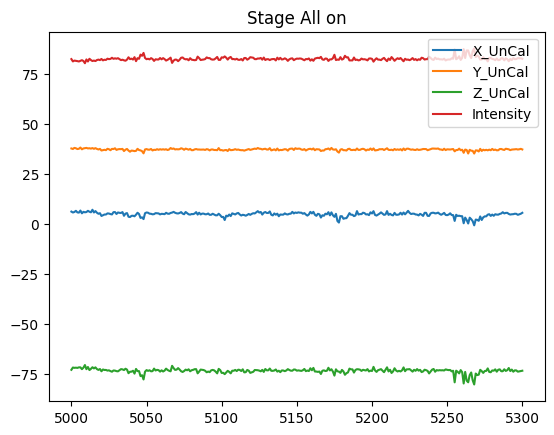

In [13]:
df_on[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].loc[start:start+size].plot(title="Stage All on")

<AxesSubplot: title={'center': 'Stage All off'}>

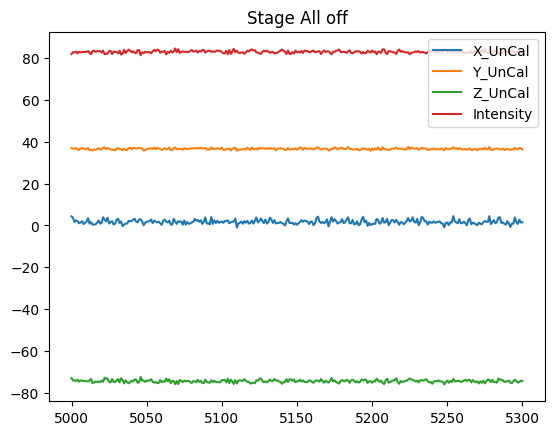

In [14]:
df_off[['X_UnCal', 'Y_UnCal', 'Z_UnCal', 'Intensity']].loc[start:start+size].plot(title="Stage All off")

# Fourier

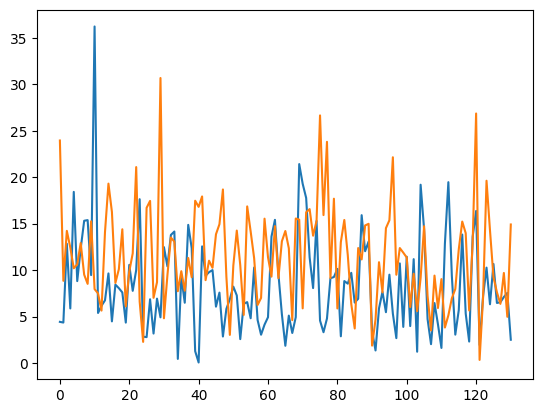

In [15]:
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from matplotlib import pyplot as plt
import numpy as np
yf_off = rfft(df_off['Intensity'].loc[start:start+size].to_numpy())
yf_on = rfft(df_on['Intensity'].loc[start:start+size].to_numpy())
# print(yf_off)
# n of samples, spacing
#xf = rfftfreq(len(x), (x[1] - x[0]) / 1000)
plt.plot(np.abs(yf_off)[20:])
plt.plot(np.abs(yf_on)[20:])
plt.show()